# Testing different workflows

### Setup

In [2]:
%load_ext autoreload
%autoreload 2

import cv2
import os
from IPython.display import Image
import matplotlib.pyplot as plt
import smolagents
import sys
from dotenv import load_dotenv

load_dotenv()

sys.path.append("..")

/Users/pouria/Documents/Coding/VideoInstruct/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
from videoinstruct.utils.transcription import transcribe_video
from videoinstruct.tools.video_screenshot import VideoScreenshotTool
from videoinstruct.tools.image_annotator import ImageAnnotatorTool

In [4]:
video_path = "../test/test_video.mp4"
transcript_path = "../test/test_transcript.txt"

### Extracting transcripts:

In [5]:
transcribe_video(video_path, transcript_path)

# Print the transcript
with open(transcript_path, "r") as file:
    print(file.read())

{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2mp41', 'title': 'Meditech Expanse - Basic Chart Walkthrough', 'artist': 'CMIO CORNER', 'date': '20190806', 'encoder': 'Lavf61.9.100', 'comment': 'https://www.youtube.com/watch?v=p_zB8Ec3VBw', 'description': 'Meditech Expanse - Basic Chart Walkthrough', 'synopsis': 'Meditech Expanse - Basic Chart Walkthrough'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': 'eng', 'default': True, 'size': [984, 720], 'bitrate': 138, 'fps': 30.0, 'codec_name': 'vp9', 'profile': '(Profile 0)', 'metadata': {'Metadata': '', 'handler_name': 'VideoHandler', 'vendor_id': '[0][0][0][0]'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': 'eng', 'default': True, 'fps': 44100, 'bitrate': 127, 'metadata': {'Metadata': '', 'handler_name': 'ISO Media file produced by Google Inc.', 'vendor_id': '[0][0][0][0]

MoviePy - Done.
Successfully extracted audio to ./temp/temp_audio.mp3
Successfully transcribed video to ../test/test_transcript.txt
[0:00:00]Welcome. In this video, we are going to do a basic walkthrough of the chart in the MediTek
[0:00:19]Expand system. You will notice that I am accessing the EMR from a web browser. The EMR can be
[0:00:28]accessed with any device, including mobile devices such as an iPad or an iPhone. The
[0:00:36]EMR is set up such that this navigation bar that you see here will always be available
[0:00:42]no matter where you are in the patient's chart. Here, you can quickly jump into different
[0:00:48]sections of the EMR such as the document section, the order section, and the discharge section
[0:00:57]of the patient's chart. When you first go into the chart, you are defaulted into the
[0:01:04]summary tab. The information in the chart is all organized into various tabs that you
[0:01:11]can see here. In the top right-hand column, I can see the patient's name, 

### Saving screenshots:

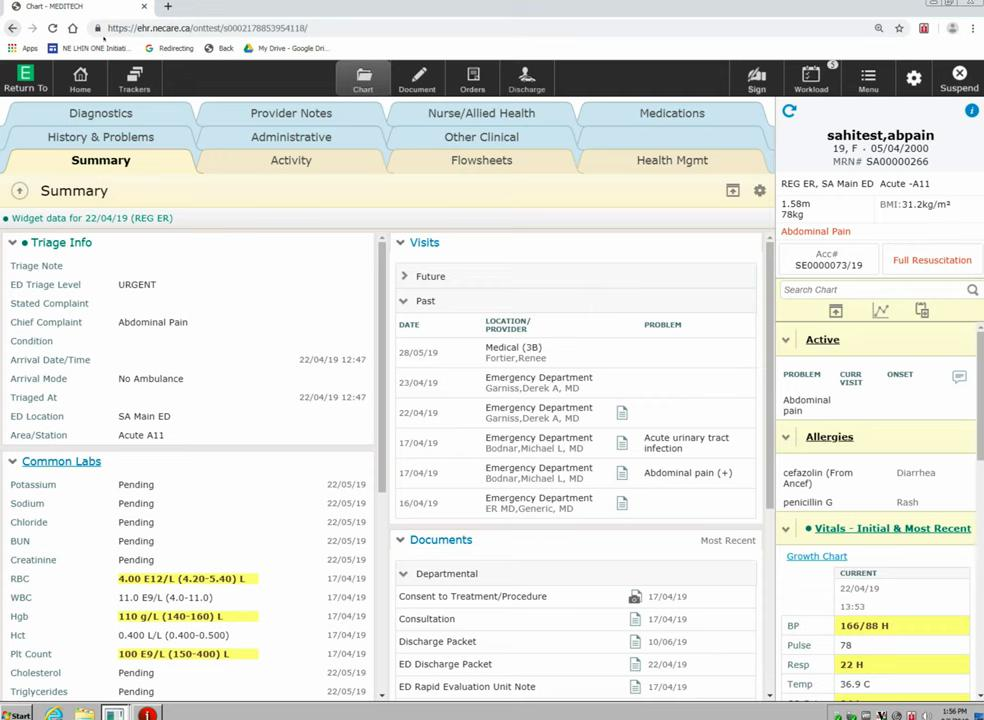

In [ ]:
screenshot = VideoScreenshotTool(video_path, "00:29")
screenshot.save("../test/test_screenshot.jpg")

# Show the screenshot
Image(filename="../test/test_screenshot.jpg")

### Annotating the screenshot

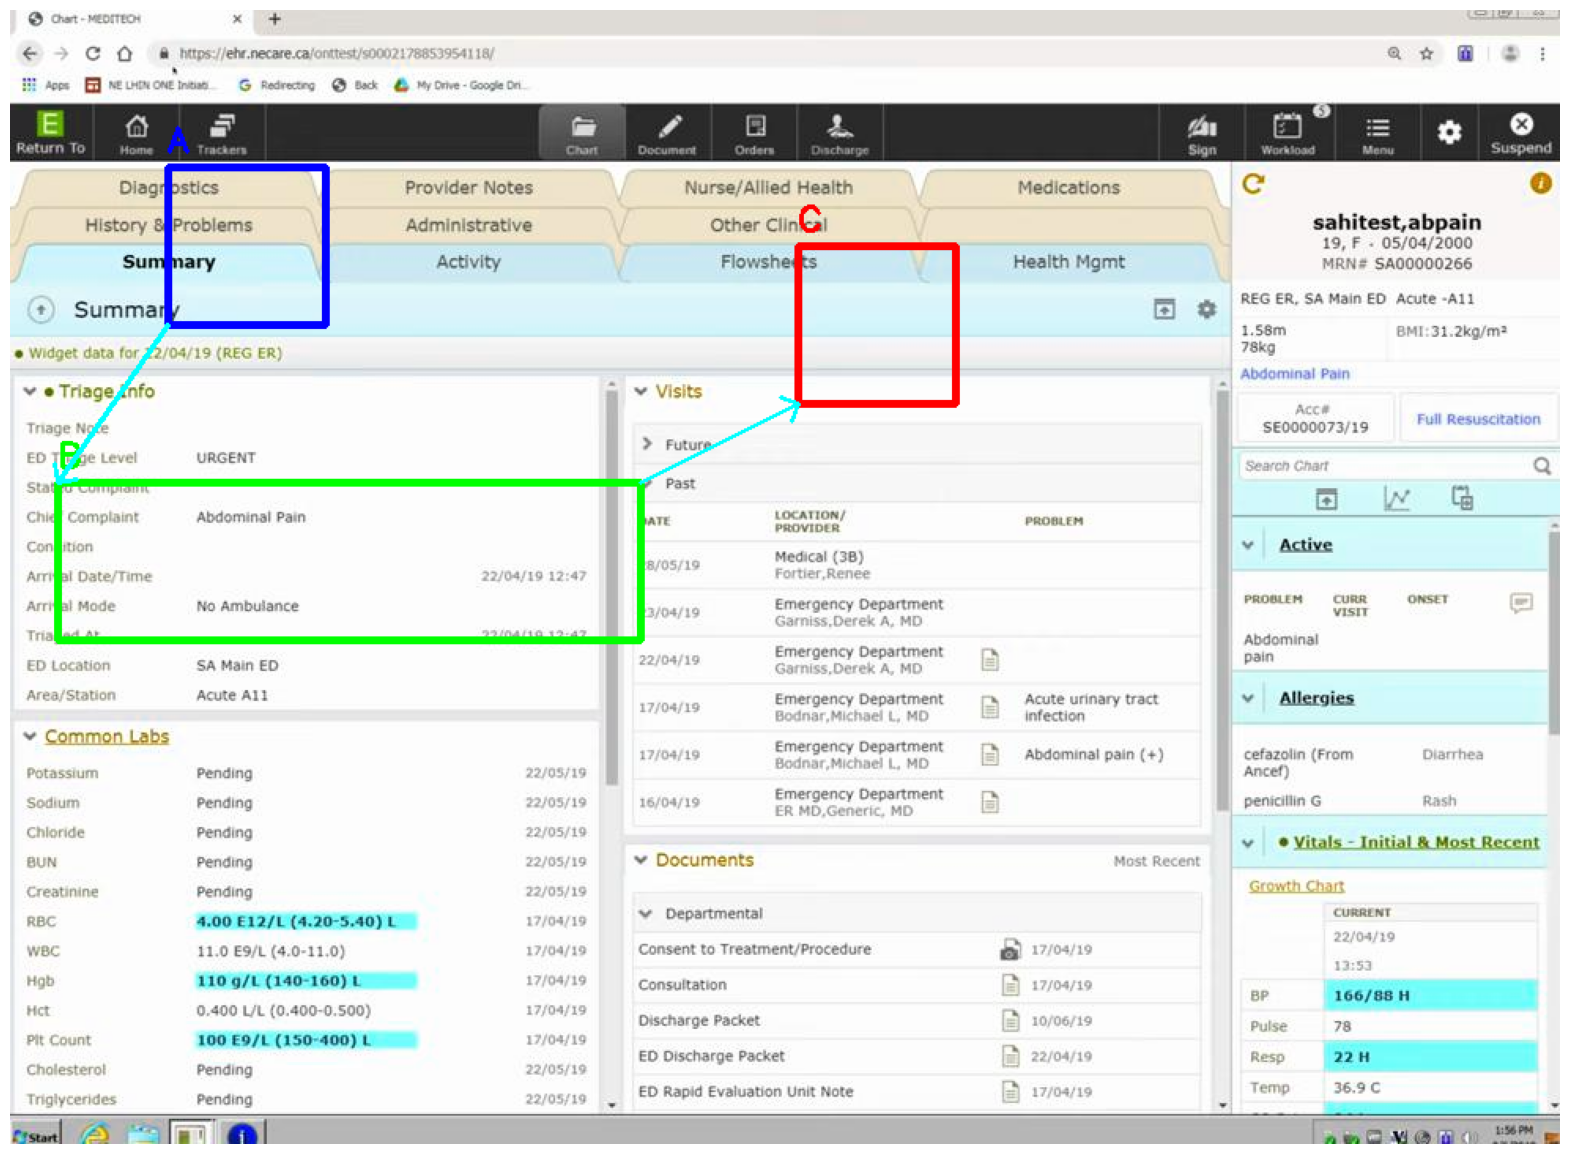

In [ ]:
boxes = [
    {
        'bbox': [100, 100, 200, 200],
        'color': 'red',
        'id': 'A',
        'destination_id': 'B'
    },
    {
        'bbox': [30, 300, 400, 400],
        'color': 'green',
        'id': 'B',
        'destination_id': 'C'
    },
    {
        'bbox': [500, 150, 600, 250],
        'color': 'blue',
        'id': 'C'
    }
]

# Custom settings
custom_settings = {
    'line_thickness': 3,
    'arrow_color': 'yellow'
}

image_path = "../test/test_screenshot.jpg"
annotated = ImageAnnotatorTool(image_path, boxes, custom_settings)

plt.figure(figsize=(20, 20))
plt.axis('off')
plt.imshow(annotated)  